In [1]:
#| echo: false

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Diskrete Zufallsvariablen

## Simulation eines Zufallsspiels

Wir schauen uns zwei Spiele an. Im Spiel `X` können wir nichts (0 EUR), 1 EUR oder 2 EUR gewinnen. Im Spiel `Y` können wir nichts (0 EUR), 3 EUR oder 4 EUR gewinnen. Jedes Mal, das wir eins der Spiele spielen, wird ein Ergebnis eintreten (wir erhalten 0, 1, oder 2 EUR). Es ist wichtig zu beachten, dass wir das Ergebnis des Spieles vor dem eigentlichen Spielen _nicht_ kennen.

Im Folgenden werden wir die Spiele `X` und `Y` mittels Zufallszahlen simulieren.

In [2]:
np.random.seed(432)

# Wir spielen 1000 Mal das Spiel X
x = np.random.choice([0, 1, 2], size=1000, p = [0.5, 0.3, 0.2])
x.shape


(1000,)

In [3]:
np.random.seed(434)

# Wir Spielen 1000 Mal das Spiel Y und speichern die Ergebnisse
# in y
y = np.random.choice([0, 1, 2], size=1000, p=[0.5, 0.1, 0.4])
y.shape

(1000,)

In [4]:
# Nun lasst uns die Spielergebnisse zählen
x_freqs = np.unique(x, return_counts=True)
x_freqs

(array([0, 1, 2]), array([492, 289, 219]))

In [5]:
y_freqs = np.unique(y, return_counts=True)
y_freqs

(array([0, 1, 2]), array([509,  73, 418]))

Text(0.5, 1.0, 'Spiel Y')

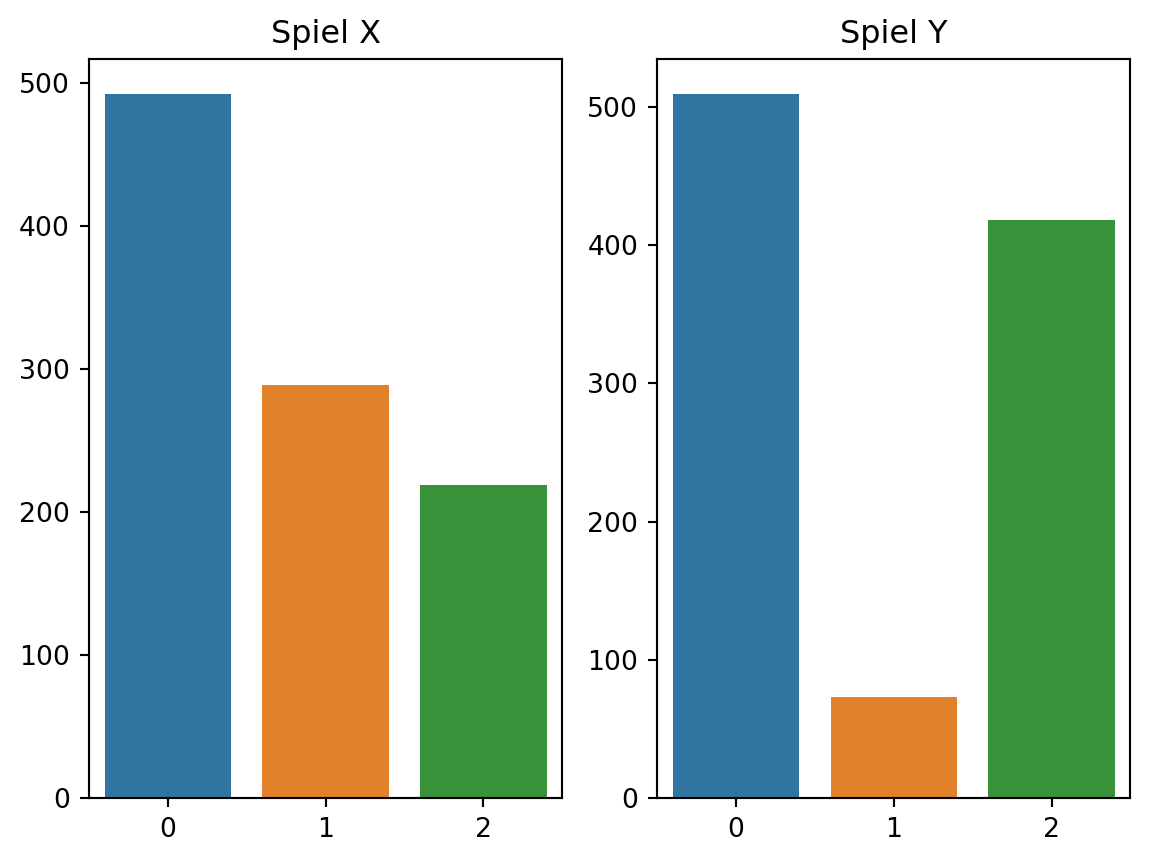

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

sns.barplot(x=x_freqs[0], y = x_freqs[1], ax=ax1)
sns.barplot(x=y_freqs[0], y=y_freqs[1], ax=ax2)

ax1.set_title('Spiel X')
ax2.set_title('Spiel Y')

In [7]:
#| label: tbl-games
#| tbl-cap: Outcomes and probabilities

games = pd.DataFrame({
    'x': [0, 1, 2],
    "p_x": [0.5, 0.3, 0.2],
    'y': [0, 1, 2],
    "p_y": [0.5, 0.1, 0.4]
})

games

,x,p_x,y,p_y
0,0,0.5,0,0.5
1,1,0.3,1,0.1
2,2,0.2,2,0.4


Wir können die Wahrscheinlichkeiten der Gewinne in beiden Spielen in einem Balkendiagramm darstellen. Vergleichen Sie die Ergebnisse
aus den Simulationen mit then Wahrscheinlichkeiten.

Text(0, 0.5, 'Wahrscheinlichkeit')

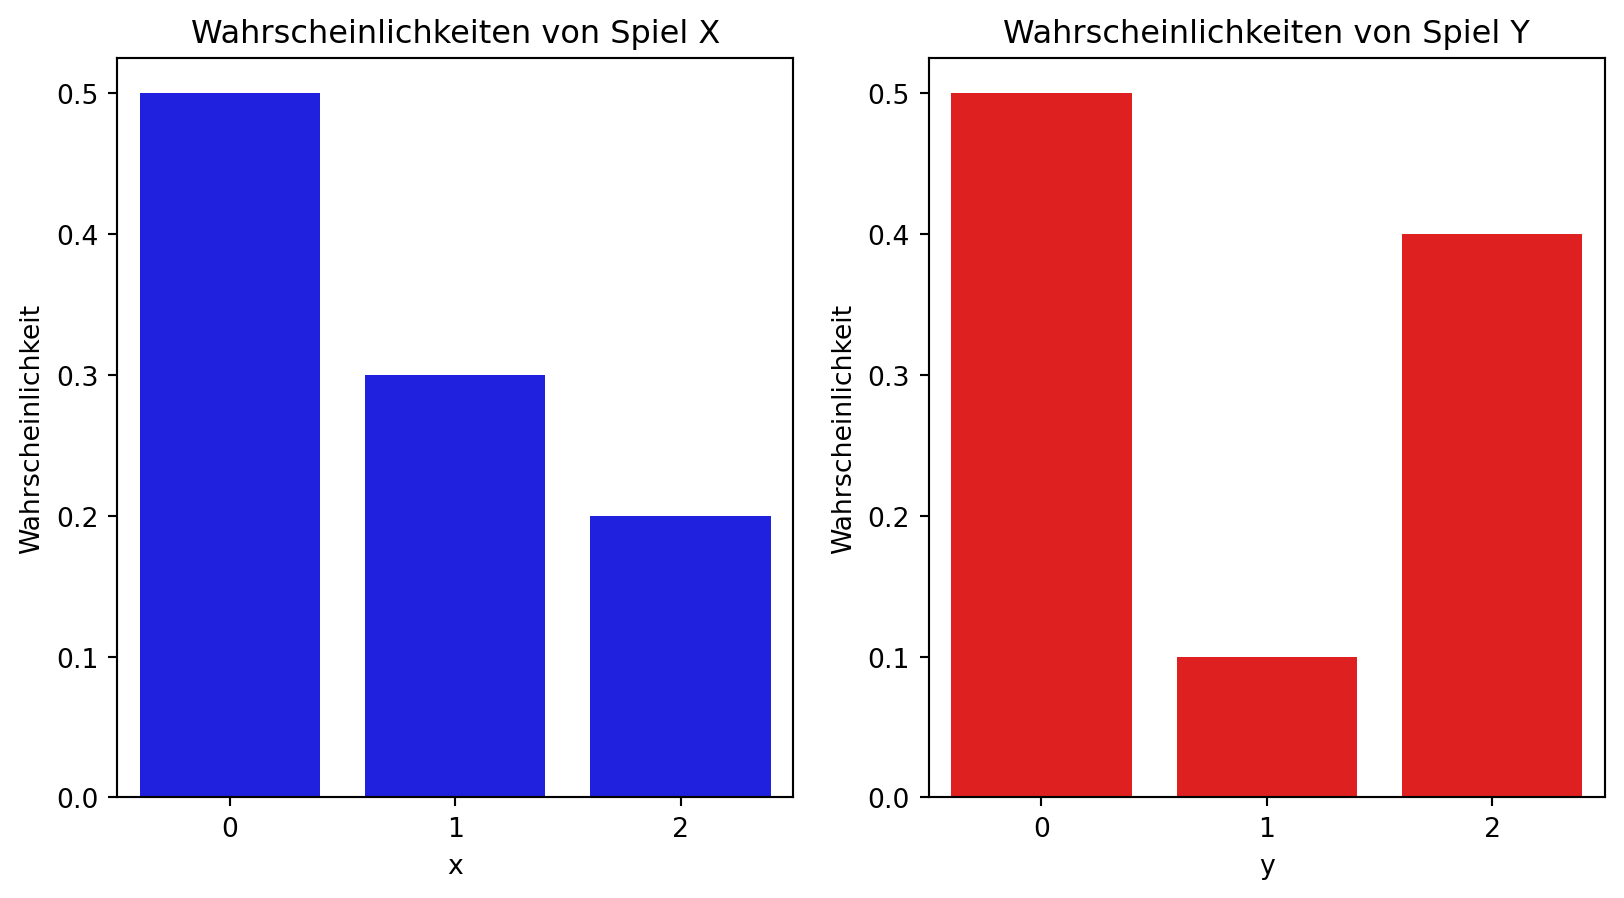

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.barplot(data=games, x="x", y="p_x", color='blue', ax = ax[0])
ax[0].set_title('Wahrscheinlichkeiten von Spiel X')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Wahrscheinlichkeit')

sns.barplot(data=games, x="y", y="p_y", color='red', ax = ax[1])
ax[1].set_title('Wahrscheinlichkeiten von Spiel Y')
ax[1].set_xlabel('y')
ax[1].set_ylabel('Wahrscheinlichkeit')


## Der Erwartungswert

Die Wahrscheinlichkeiten in der Tabelle oben beschreiben die *Regeln* der beiden Spiele. Aus Ihnen können wir zwar schwer vorhersagen, was das Ergebnis im nächsten Spiel sein wird, allerdings können wir eine große Anzahl von Spielen beschreiben.

Die Funktion, die jedes Ergebnis einer Zahl zwischen 0 und 1 zuordnet nennen wir eine Warhscheinlichkeitsfunktion. Die Tabelle oben können wir 
als Wahrscheinlichkeitsfunktionen für die Spiele `X` und `Y` schreiben.

$$
p_X(x) = \begin{cases}
0.5 & \text{für } x = 0 \\
0.3 & \text{für } x = 1 \\
0.2 & \text{für } x = 2 \\
\end{cases}
$$

$$
p_Y(x) = \begin{cases}
0.5 & \text{für } x = 0 \\
0.1 & \text{für } x = 3 \\
0.4 & \text{für } x = 4 \\
\end{cases}
$$

:::{.callout-warning}
Die Wahrscheinlichkeitsfunktionen müssen die folgenden Bedingungen erfüllen:

- Die Wahrscheinlichkeiten müssen zwischen 0 und 1 liegen.
- Die Summe der Wahrscheinlichkeiten muss 1 ergeben. Für eine Zufallsvariable $X$ mit den möglichen Ergebnissen $x_1, x_2, \ldots, x_n$ und den Wahrscheinlichkeiten $p_1, p_2, \ldots, p_n$ bedeutet das:

$$
\sum_{i=1}^n p(x_i) = 1
$$

:::

Sehr häufig möchten wir diese Funktionen zusammenfassen. Zum Beispiel, aus Sicht des Spielveranstalters müssen wir entscheiden, welchen Preis für ein Spielticket zu setzen. Um das machen zu können müssen wir wissen wie viel wir im  Durchschnitt zahlen werden müssen, falls wir eine große Anzahl von Tickets verkaufen.

In der Simulation oben haben wir gesehen, daß im Spiel `X` die Wahrscheinlichkeiten (0.5, 0.3, 0.2) bedeuten, daß aus 1000 Spielen ungefähr 
500 Tickets keinen Gewinn bringen. Für ungefähr 300 Tickets werden wir 1 EUR zahlen müssen und für ungefähr 200 Tickets werden wir 2 EUR zahlen müssen.

Insgesamt werden wir ungefähr

$$
500 \times 0 + 300 \times 1 + 200 \times 2 = 700
$$

Euro zahlen müssen. Wenn wir die Gesamtzahlung durch die Anzahl der verkauften Tickets dividieren, erhalten wir die durchschnittliche Zahlung pro Ticket, die wir leisten müssen.

$$
\frac{700}{1000} = 0.7
$$

Diese Zahl ist der **Erwartungswert** des Spieles `X`. Anders geschrieben:

$$
\begin{align*}
\frac{500 \times 0 + 300 \times 1 + 200 \times 2}{1000} =  \\
0 \times \frac{500}{1000} + 1 \times \frac{300}{1000} + 2 \times \frac{200}{1000} = \\
0 \times 0.5 + 1 \times 0.3 + 2 \times 0.2 = \\
\end{align*}
$$

:::{#def-expected-value}
## Erwartungswert

Formal ist der Erwartungswert die gewichtete Summe der möglichen Ergebnisse. Für eine Zufallsvariable $X$ mit den möglichen Ergebnissen $x_1, x_2, \ldots, x_n$ und den Wahrscheinlichkeiten $p_1, p_2, \ldots, p_n$ ist der Erwartungswert

$$
E(X) = x_1 \cdot p_1 + x_2 \cdot p_2 + \ldots + x_n \cdot p_n = \sum_{i=1}^n x_i \cdot p_i
$$

:::

In [9]:
# Der Erwartungswert von X

E_X = np.sum(games["x"] * games["p_x"])
E_X

0.7

In [10]:
E_Y = np.sum(games["y"] * games["p_y"])
E_Y

0.9

Vergleichen wir diese Erwartungswerte mit den beobachteten Mittelwerten in den Simulationen

In [11]:
np.mean(x)

0.727

In [12]:
np.mean(y)

0.909

## Eigenschaften des Erwartungswertes

Der Erwartungswert ist ein linearer Operator. Das bedeutet, daß der Erwartungswert einer Summe von Zufallsvariablen gleich der Summe der Erwartungswerte ist.

:::{#thm-expectation-linearity}
Es seien $X$ und $Y$ zwei Zufallsvariablen und $a$ und $b$ zwei Konstanten (reale Zahlen). Dann gilt

$$
E(aX + bY) = aE(X) + bE(Y)
$$
:::
:::{.proof .callout-note collapse="true"}
## Beweis

Für den Beweis verwenden wir die Definition des Erwartungswertes und die Tatsache, daß die Konstante $a$ aus der Summe herausgezogen werden kann (sie hängt nicht von dem Index der Summe ab).

$$
\begin{align*}
E(aX) = \sum_{i=1}^n a x_i p_i = a \sum_{i=1}^n x_i p_i = aE(X) \\
\end{align*}
$$

Für den zweiten Teil des Beweises brauchen wir die gemeinsame Wahrscheinlichkeitsfunktion ($p_{X,Y}$) von $X$ und $Y$, die in @sec-joint-distribution eingeführt wird. Sie können den Beweis zuerst überspringen und später zurückkehren.

$$
\begin{align*}
E(X + Y) = \sum_{x}\sum_{y} (x + y) p_{X,Y}(x, y) = \sum_{x}\sum_{y} (x p_{X,Y}(x, y) + y p_{X,Y}(x, y))
\end{align*}
$$

Wir können die Summe in zwei Teile aufteilen.

$$
\begin{align*}
E(X + Y) = \sum_{x}\sum_{y} x p_{X,Y}(x, y) + \sum_{x}\sum_{y} y p_{X,Y}(x, y)
\end{align*}
$$

Nun sollten wir merken, dass es in beiden Summen Komponenten gibt, die wir ausklammern können.

$$
\begin{align*}
E(X + Y) = \sum_{x} x \sum_{y} p_{X,Y}(x, y) + \sum_{y} y \sum_{x} p_{X,Y}(x, y)
\end{align*}
$$

Die Ausdrücke

$$
\begin{align*}
\sum_{y} p_{X,Y}(x, y) = p_X(x) \\
\sum_{x} p_{X,Y}(x, y) = p_Y(y)
\end{align*}
$$

sind die Randverteilungen von $X$ und $Y$. Sie sind in @def-marginal-distribution eingeführt. Wir können sie in den Ausdrücken oben ersetzen.

Am Ende erhalten wir

$$
\begin{align*}
E(X + Y) = \sum_{x} x p_X(x) + \sum_{y} y p_Y(y) = E(X) + E(Y)
\end{align*}
$$
:::

## Die Varianz

Die Varianz ist ein Maß für die Streuung von Werten. Wir haben in der deskriptiven Statistik die empirische Varianz kennengelernt. Die empirische Varianz ist ein Maß für die Streuung von Werten um den Mittelwert. Die Varianz einer Verteilung (Zufallsvariable) ist ein Maß für die Streuung der Werte, die diese Verteilung produzieren wird (wenn wir das Spiel spielen).

:::{#def-variance}

## Varianz

Die Varianz einer Zufallsvariable $X$ mit den möglichen Ergebnissen $x_1, x_2, \ldots, x_n$ und den Wahrscheinlichkeiten $p_1, p_2, \ldots, p_n$ ist

$$
\text{Var}(X) = E\left((X - E(X))^2\right) = \sum_{i=1}^n (x_i - E(X))^2 \cdot p_i
$$

:::

In [13]:
# Lasst uns die Varianz von X berechnen

# Den Erwartungswert von X haben wir bereits berechnet und unter E_X gespeichert

# Für die Varianz von X berechnen wir Differenz der möglichen Ergebnisse von X
# zum Erwartungswert

x_diff_erwartungswert = games["x"] - E_X

# Danach quadrieren wir die Differenzen
x_diff_erwartungswert_squared = x_diff_erwartungswert ** 2

# Am ende multiplizieren wir die quadrierten Differenzen mit den Wahrscheinlichkeiten für X=0, X=1 und X=2

var_X = np.sum(x_diff_erwartungswert_squared * games["p_x"])
var_X

0.6100000000000001

In [14]:
# Das gleiche können wir für Y machen, diesmal ohne die Zwischenschritte

var_Y = np.sum(games["p_y"] * (games["y"] - E_Y) ** 2)
var_Y

0.8900000000000001

Die Varianz von Y ist größer als die Varianz von X. Das bedeutet, daß die Werte, die Y produziert, weiter von ihrem Erwartungswert entfernt sein werden als die Werte, die X produziert.

Sehr häufig ist der folgende Satz nützlich

:::{#thm-variance-decomposition}
## Varianzzerlegung

Die Varianz einer Zufallsvariable $X$ kann in zwei Teile zerlegt werden:

$$
\text{Var}(X) = E(X^2) - (E(X))^2
$$
:::
:::{.proof}

Der Beweis ist einfach. Wir beginnen mit der Definition der Varianz, danach schreiben wir die quadratische Formel um und benutzen die Linearität (@thm-expectation-linearity)  des Erwartungswertes.

$$
\begin{align*}
\text{Var}(X) & = E\left((X - E(X))^2\right) \\
& = E(X^2 - 2X \cdot E(X) + (E(X))^2) \\
& = E(X^2) - 2E(X) \cdot E(X) + (E(X))^2 \\
& = E(X^2) - (E(X))^2
\end{align*}
$$

:::

## Die gemeinsame Verteilung {#sec-joint-distribution}

Bisher haben wir uns nur mit einer Zufallsvariablen beschäftigt. Stellen wir uns vor, daß wir ein Spiel spielen, das zwei Ergebnisse produziert. Zum Beispiel können wir zwei Münzen werfen. Die Ergebnisse können sein: (Kopf, Kopf), (Kopf, Zahl), (Zahl, Kopf), (Zahl, Zahl). Oder aber wir spielen die Spiele `X` und `Y` und die Ergebnisse können sein (0, 0), (0, 3), (0, 4), (1, 0), (1, 3), (1, 4), (2, 0), (2, 3), (2, 4). Genau wir im ein-dimensionalen Fall können wir die Wahrscheinlichkeiten der Ergebnisse in einer Tabelle zusammenfassen.

Um ein Beispiel zu geben, werden wir Wahrscheinlichkeiten für dieses Spiel ausdenken.

In [15]:
import itertools
np.random.seed(322)

# Wir erzeugen 9 Zufallszahlen
joint_probs = np.random.rand(9)

games2 = pd.DataFrame(itertools.product([0, 1, 2], [0, 1, 2]), columns=["x", "y"])
# Damit diese Zufallszahlen die Bedingungen einer Wahrscheinlichkeitsverteilung erfüllen,
# müssen sie normiert werden, damit sie sich zu 1 summieren

games2["p_xy"] =  joint_probs / joint_probs.sum()
games2

,x,y,p_xy
0,0,0,0.198694
1,0,1,0.068238
2,0,2,0.132942
3,1,0,0.080278
4,1,1,0.008387
5,1,2,0.278337
6,2,0,0.095935
7,2,1,0.051734
8,2,2,0.085454


In diesem Spiel ist das wahrscheinlichste Ergebnis (1, 2) mit einer Wahrscheinlichkeit von 0.278. 

Sehr häufig werden Sie diese Art von Tabelle in der Statistik sehen. Sie wird als **gemeinsame Verteilung** bezeichnet und wird oft in Tabellen dargestellt, wo
die Werte des ersten Ergebnißes in den Zeilen und die Werte des zweiten Ergebnisses in den Spalten stehen. In den Zellen der Tabelle stehen die Wahrscheinlichkeiten.

In [16]:
games2_wide = games2.pivot(index="x", columns="y", values="p_xy")
games2_wide

y,0,1,2
x,,,
0,0.198694,0.068238,0.132942
1,0.080278,0.008387,0.278337
2,0.095935,0.051734,0.085454


Diese Ansicht is nützlich, denn sie erlaubt uns die Randverteilungen einfach (per Hand) zu berechnen. Die Randverteilungen sind die Verteilungen der einzelnen Zufallsvariablen. In unserem Beispiel sind die Randverteilungen die Verteilungen von `X` und `Y`.

Die Randverteilung beantwortet die Frage: "Was ist die Wahrscheinlichkeit, daß das erste Ergebnis 1 ist?" oder "Was ist die Wahrscheinlichkeit, daß das zweite Ergebnis 2 ist?", usw.

In der Tabelle oben kann $X = 1$ in drei verschiedenen Fällen eintreten: (1, 0), (1, 1), und (1, 2). Die Wahrscheinlichkeit, daß $X = 1$ ist, ist die Summe der Wahrscheinlichkeiten dieser drei Fälle, denn die Ereignisse sind disjunkt.

Deswegen ist die Wahrscheinlichkeit, daß $X = 0$ ist, gleich 0.1986 + 0.0682 + 0.132942.
Dieselbe Überlegung führ uns zu der Wahrscheinlichkeit, daß $X = 1$ ist: 0.080278 + 0.008387 + 0.278337
und zu der Wahrscheinlichkeit, daß $X = 2$ ist: 0.095935 + 0.051734 + 0.085454.

Ganz allgemein ergibt sich die Randverteilung von $X$ aus der gemeinsamen Verteilung, indem die Wahrscheinlichkeiten in den Zeilen addiert werden.

Wenn wir die Tabelle spaltenweise addieren, erhalten wir die Randverteilung von $Y$.

:::{#def-marginal-distribution}
## Randverteilungen

Betrachten wir ein gemeinsame Wahrscheinlichkeitsfunktion $p_{X,Y}(x, y)$ für zwei Zufallsvariablen $X$ und $Y$. Die Randverteilungen von $X$ und $Y$ sind

$$
p_X(x) = \sum_{y} p_{X,Y}(x, y)
$$

und

$$
p_Y(y) = \sum_{x} p_{X,Y}(x, y)
$$

:::

In Python ist es einfacher, die lange Form der Tabelle zu nutzen

In [17]:
games2.groupby("x").sum() # Dir Randverteilung von X

,y,p_xy
x,,
0,3,0.399875
1,3,0.367002
2,3,0.233123


In [18]:
games2.groupby("y").sum() # Die Randverteilung von Y

,x,p_xy
y,,
0,3,0.374907
1,3,0.128359
2,3,0.496734


# Die bedingte Verteilung

Bisher haben wir die gemeinsame Verteilung und die Randverteilungen betrachtet. Diese Verteilungen beantworten die Fragen:

- Was ist die Wahrscheinlichkeit, daß das erste Ergebnis x **und** das zweite Ergebnis y ist? (gemeinsame Verteilung)
- Was ist die Wahrscheinlichkeit, daß das erste Ergebnis x ist? (Randverteilung von X)
- Was ist die Wahrscheinlichkeit, daß das zweite Ergebnis y ist? (Randverteilung von Y)

 Es gibt noch ein wichtiges Konzept, das wir betrachten müssen: die **bedingte Verteilung**. Stellen wir uns vor, dass wir die zwei Spiele nach einander spielen und das wir bereits das Ergebnis des ersten Spieles kennen. Lasst uns annehmen, dass wir vom ersten Spiel 1 EUR gewonnen haben. Was ist die Wahrscheinlichkeit, dass wir im zweiten Spiel 3 EUR gewinnen werden?

 Falls das erste Ergebnis 1 ist, dann sind die möglichen Ergebnisse des zweiten Spieles (1, 0), (1, 1), und (1, 2). Die restlichen Ergebnisse (0, 0), (0, 1), 
    (0, 2), (2, 0), (2, 1), und (2, 2) sind nicht möglich.
 
Nach der gemeinsamen Verteilung sind die Wahrscheinlichkeiten dieser Ergebnisse sind 0.080278, 0.008387, und 0.278337. Diese Werte sind allerdings keine Wahrscheinlichkeitsverteilung (die Summe ist nicht 1). Wir müssen die Werte normieren, indem wir jeden Wert durch die Summe der Werte teilen.

Wir erhalten dadurch die **bedingte** Verteilung von $Y$ gegeben $X = 1$. Diese Verteilung beantwortet die Frage: "Was ist die Wahrscheinlichkeit, daß das zweite Ergebnis y ist, gegeben daß das erste Ergebnis 1 ist?"

Wir können die bedingten Verteilungen von $Y$ für jeden Wert von $X$ berechnen. Wir müssen nur die gemeinsame Verteilung durch die Randverteilung von $X$ teilen.

In [19]:
games2

,x,y,p_xy
0,0,0,0.198694
1,0,1,0.068238
2,0,2,0.132942
3,1,0,0.080278
4,1,1,0.008387
5,1,2,0.278337
6,2,0,0.095935
7,2,1,0.051734
8,2,2,0.085454


In [20]:
games2["p_x"] = games2.groupby("x")["p_xy"].transform('sum') # Die Randverteilung von X
games2["p_y_given_x"] = games2["p_xy"] / games2["p_x"] # Die bedingte Wahrscheinlichkeit von Y gegeben X
games2

,x,y,p_xy,p_x,p_y_given_x
0,0,0,0.198694,0.399875,0.496891
1,0,1,0.068238,0.399875,0.170649
2,0,2,0.132942,0.399875,0.332459
3,1,0,0.080278,0.367002,0.218740
4,1,1,0.008387,0.367002,0.022852
5,1,2,0.278337,0.367002,0.758408
6,2,0,0.095935,0.233123,0.411521
7,2,1,0.051734,0.233123,0.221916
8,2,2,0.085454,0.233123,0.366563


In [21]:
# Überprüfen wir, dass sich die bedingten Wahrscheinlichkeiten zu 1 summieren

games2.groupby("x")["p_y_given_x"].sum()

x
0    1.0
1    1.0
2    1.0
Name: p_y_given_x, dtype: float64

## Unabhängigkeit


:::{#def-independence}

## Unabhängigkeit

Zwei Zufallsvariablen $X$ und $Y$ nennen wir unabhängig, falls die gemeinsame Verteilung das Produkt der Randverteilungen ist.

$$
p_{X,Y}(x, y) = p_X(x) \cdot p_Y(y)
$$

:::


Für unabhängige Zufallsvariablen gilt, daß die bedingten Verteilungen 

Zwei Zufallsvariablen $X$ und $Y$ nennen wir unabhängig, wenn die bedingten Verteilungen von $Y$ gleich der Randverteilung von $Y$ sind (dasselbe gilt auch für X).


:::{#thm-independence-conditional-expectation}
## Unabhängigkeit und bedingte Verteilungen

Unter Unabhängigkeit sind die bedingten Verteilungen von $Y$ für jeden Wert von $X$ gleich der Randverteilung von $Y$.

$$
p_{Y|X}(y|x) = p_Y(y)
$$

für alle $x$.
:::
:::{.proof}

Die Randverteilung von $Y$ erhalten wir, indem wir die gemeinsame Verteilung über die möglichen Werte von $X$ summieren.

$$
p_Y(y) = \sum_{x} p_{X,Y}(x, y)
$$

Die bedingte Verteilung von $Y$ gegeben $X$ erhalten wir, indem wir die gemeinsame Verteilung durch die Randverteilung von $X$ teilen.

$$
p_{Y|X}(y|x) = \frac{p_{X,Y}(x, y)}{p_X(x)}
$$

Da sich laut @def-independence die gemeinsame Verteilung als Produkt der Randverteilungen schreiben lässt, erhalten wir

$$
p_{Y|X}(y|x) = \frac{p_X(x)p_Y(y)}{p_X(x)} = p_Y(y)
$$
:::

In [22]:
# Hier konstruieren wir die gemeinsame Verteilung von den Randverteilungen der 
# beiden Spiel X und Y

xy = list(itertools.product([0, 1, 2], [0, 1, 2]))
probs = list(itertools.product([0.5, 0.3, 0.2], [0.5, 0.1, 0.4]))

# Wir multiplizieren die Randverteilungen von X und Y um die gemeinsame Verteilung zu erhalten
joint_probs = [p_x * p_y for p_x, p_y in probs]

games_ind = pd.DataFrame(xy, columns=["x", "y"])
games_ind["p_xy"] = joint_probs
games_ind

,x,y,p_xy
0,0,0,0.25
1,0,1,0.05
2,0,2,0.20
3,1,0,0.15
4,1,1,0.03
5,1,2,0.12
6,2,0,0.10
7,2,1,0.02
8,2,2,0.08


In [23]:
# Lasst uns die bedingten Verteilungen von Y gegeben X berechnen (für jedes x)

games_ind["p_y_given_x"] = games_ind["p_xy"] / games_ind.groupby("x")["p_xy"].transform('sum')
games_ind

,x,y,p_xy,p_y_given_x
0,0,0,0.25,0.5
1,0,1,0.05,0.1
2,0,2,0.20,0.4
3,1,0,0.15,0.5
4,1,1,0.03,0.1
5,1,2,0.12,0.4
6,2,0,0.10,0.5
7,2,1,0.02,0.1
8,2,2,0.08,0.4


Was wir feststellen müssen ist es, daß die bedingten Verteilungen von $Y$ gegeben $X$ für jeden Wert von $X$ gleich sind.

In [24]:
# Lasst und die Randverteilung von Y berechnen

p_y = games_ind.groupby("y")["p_xy"].sum()
p_y

y
0    0.5
1    0.1
2    0.4
Name: p_xy, dtype: float64

## Der bedingte Erwartungswert

Bisher haben wir den Erwartungswert von Zufallsvariablen in Bezug auf ihre Randverteilungen berechnet. Wir können auch den Erwartungswert in Bezug auf die bedingte Verteilung berechnen. Diesen Erwartungswert nennen wir den bedingten Erwartungswert.

:::{#def-conditional-expectation}
## Bedingter Erwartungswert

Der bedingte Erwartungswert von $Y$ gegeben $X = x$ ist

$$
E(Y|X = x) = \sum_{y} y \cdot p_{Y|X}(y|x)
$$
:::

Im Fall von unabhängigen Zufallsvariablen sind die bedingten Erwartungswerte gleich dem (unbedingten) Erwartungswert. Das ist eine direkte Folge aus der Tatsache, daß die bedingten Verteilungen gleich der Randverteilung sind.

In [25]:
# Als Beispiel berechnen wir die bedingten Erwartungswerten von Y gegeben X 
# in den zwei Beispielen, die wir oben hatten

E_Y_given_X = games2.groupby("x").apply(lambda gr: np.sum(gr["y"] * gr["p_y_given_x"]))
E_Y_given_X

x
0    0.835568
1    1.539668
2    0.955041
dtype: float64

Der bedingte Erwartungswert von $Y$ ist bei $X = 2$ am größten und bei $X = 0$ am kleinsten. Das heißt, dass sich unsere Erwartungen über den Gewinn aus Spiel $Y$ ändern, wenn wir das Ergebnis von Spiel $X$ kennen.

In [26]:
# Im Fall der unabhängigen Zufallsvariablen X und Y in games_ind

E_Y_given_X_ind = games_ind.groupby("x").apply(lambda gr: np.sum(gr["y"] * gr["p_y_given_x"]))
E_Y_given_X_ind

x
0    0.9
1    0.9
2    0.9
dtype: float64

Im Fall von unabhängigen Zufallsvariablen ist der bedingte Erwartungswert gleich dem (unbedingten) Erwartungswert. Das heißt, dass wir aus der Kenntnis des Ergebnisses von $X$ keine zusätzliche Information über das Ergebnis von $Y$ erhalten.

## Die Kovarianz

Wir haben bisher die Randverteilungen von Zufallsvariablen durch den Erwartungswert (Lage) und durch die Varianz (Streuung) zusammengefasst. Wir können auch die gemeinsame Verteilung von zwei Zufallsvariablen hinsichtlich des Zusammenhangs zwischen den beiden Variablen zusammenfassen.


:::{#def-covariance}
## Kovarianz

$$
\text{Cov}(X, Y) = E_{XY}((X - E(X)) \cdot (Y - E(Y)))
$$

Wir schreiben $E_{XY}$, um zu betonen, daß wir den Erwartungswert über die gemeinsame Verteilung berechnen.

:::

Um die Kovarianz berechnen zu können ist oftmals der folgende Satz nützlich:

:::{#thm-covariance-decomposition}
## Zerlegung der Varianz

$$
\text{Cov}(X, Y) = E_{XY}(X \cdot Y) - E(X) \cdot E(Y)
$$
:::{.proof}

Der Satz ist sehr leicht zu beweisen. Wir müssen nur die Definition der Kovarianz und die Definition des Erwartungswertes benutzen.

$$
\begin{align*}
\text{Cov}(X, Y) & = E_{XY}((X - E(X)) \cdot (Y - E(Y))) \\
& = E_{XY}(X \cdot Y - X \cdot E(Y) - E(X) \cdot Y + E(X) \cdot E(Y)) \\
& = E_{XY}(X \cdot Y) - E_{XY}(X \cdot E(Y)) - E_{XY}(E(X) \cdot Y) + E_{XY}(E(X) \cdot E(Y)) \\
& = E_{XY}(X \cdot Y) - E(X) \cdot E(Y)
\end{align*}
$$


:::

In [27]:
# Berechnen wir die Kovarianz für die zwei Spiele in games2

games2["xy"] = games2["x"] * games2["y"]
E_XY = np.sum(games2["xy"] * games2["p_xy"])

cov_XY = E_XY - E_X * E_Y
cov_XY

0.38034575941137405

In [28]:
# Berechnen wir die Kovarianz für die zwei Spiele in games_ind

games_ind["xy"] = games_ind["x"] * games_ind["y"]
E_XY_ind = np.sum(games_ind["xy"] * games_ind["p_xy"])
E_X_ind = np.sum(games["x"] * games["p_x"])

E_Y_ind = np.sum(games["y"] * games["p_y"])
cov_XY_ind = E_XY_ind - E_X_ind * E_Y_ind
cov_XY_ind

1.1102230246251565e-16

Was wir uns hier merken können ist es, dass die Kovarianz im Fall von unabhängigen Zufallsvariablen null ist. Die Umkehrung ist jedoch nicht wahr. Es ist durchaus möglich, daß zwei Variablen eine Kovarianz von null haben, die allerdings nicht unabhängig sind.

:::{#thm-covariance-independence}

Es seien $X$ und $Y$ zwei unabhängige Zufallsvariablen. Dann ist ihre Kovarianz gleich null.

$$
\text{Cov}(X, Y) = 0
$$
:::
:::{.proof}
Wir starten mit der Zerlegung der Kovarianz aus @thm-covariance-decomposition und benutzen die Tatsache, daß die gemeinsame Verteilung das Produkt der Randverteilungen ist. Wir werden den Satz im diskreten Fall beweisen, allerdings gilt der Satz auch für stetige Verteilungen.

$$
\begin{align*}
\text{Cov}(X, Y) & = E_{XY}(X \cdot Y) - E_X(X) \cdot E_Y(Y) 
\end{align*}
$$

Der Erwartungswert des Produktes von $X$ und $Y$ ist einfach die Summe aller möglichen Produkte der Werte von $X$ und $Y$ multipliziert mit den Wahrscheinlichkeiten, daß
diese Werte eintreten. Wir werden die Tatsache benutzen, daß die gemeinsame Verteilung das Produkt der Randverteilungen ist.

$$
p_{XY}(x, y) = p_X(x) \cdot p_Y(y)
$$

$$
\begin{align*}
E_{XY}(X \cdot Y) & = \sum_{x} \sum_{y} x \cdot y \cdot p_{XY}(x, y) x \cdot y \\
& = \sum_{x} \sum_{y} x \cdot y \cdot p_X(x) \cdot p_Y(y) \\
& = \left(\sum_{x} x \cdot p_X(x) \right) \left(\sum_{y} y \cdot p_Y(y)\right) \\
& = E_X(X) \cdot E_Y(Y)
\end{align*}
$$
:::